In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # Task -- Regression
 First, let’s see how ratings can be predicted as a function of (a) whether a review is a ‘verified purchase’, and (b) the length of the review (in characters).

 ## Problem 1
 What is the distribution of ratings in the dataset? That is, how many 1-star, 2-star, 3-star (etc.) reviews are there? You may write out the values or include a simple plot (1 mark).

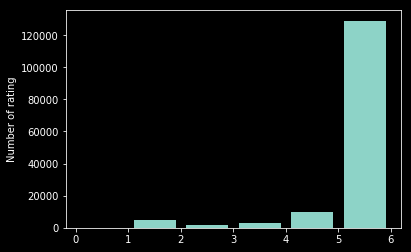

In [1]:
# ignore the warnings from Pandas
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read data
data = pd.read_csv('./Homework1/amazon_reviews_us_Gift_Card_v1_00.tsv', delimiter='\t').dropna()
plt.hist(data['star_rating'], bins=[0,1,2,3,4,5,6],rwidth=0.8)
plt.xticks(range(0, 7))
plt.ylabel('Number of rating')
plt.show()



 ## Problem 3
 Train a simple predictor to predict the star rating using two features:

 star_rating ≃ θ0 + θ1 × [review is verified] + θ2 × [review length].

 Report the values of θ0, θ1, and θ2. Briefly describe your interpretation of these values, i.e., what do θ0, θ1, and θ2 represent? Explain these in terms of the features and labels, e.g. if the coefficient of ‘review length’ is negative, what would that say about verified versus unverified reviews (1 mark)?

In [2]:
# Data preprocessing
data['verified_purchase_int'] = data.apply(lambda x: int(x['verified_purchase'] == "Y"), axis = 1)
data['review_body_length'] = data.apply(lambda x: len(x['review_body']), axis = 1)
data['theta_zero'] = 1



In [3]:
# Define My Own Regression
def myRegression(featureNames, labelName, data):
    X, y = data[featureNames], data[labelName]
    theta, residuals, rank, s = np.linalg.lstsq(X, y)
    MSE = ((y - np.dot(X, theta))**2).mean()
    print("Theta: ", theta)
    print("MSE: ", MSE)

featureNames = ['theta_zero', 'verified_purchase_int', 'review_body_length']
labelName = 'star_rating'
myRegression(featureNames, labelName, data)



Theta:  [ 4.84501720e+00  4.98738862e-02 -1.24542755e-03]
MSE:  0.6508730403935653


 Explanation.

 ## Problem 4
 Train another predictor that only uses one feature:

 star rating ≃ θ0 + θ1 × [review is verified]

 Report the values of θ0 and θ1. Note that coefficient you found here might be quite different (i.e., much larger or smaller) than the one from Question 3, even though these coefficients refer to the same feature. Provide an explanation as to why these coefficients might vary so significantly (1 mark).1

In [4]:
featureNames = ['theta_zero', 'verified_purchase_int']
labelName = 'star_rating'
myRegression(featureNames, labelName, data)



Theta:  [4.5781106  0.16796432]
MSE:  0.6854213460544826


 ## Problem 5
 Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on the order they appear in the file). Train the same model as above on the training set only. What is the model’s MSE on the training and on the test set (1 mark)?

In [5]:
def myRegression(featureNames, labelName, dataTrain, dataTest):
    X, y = dataTrain[featureNames], dataTrain[labelName]
    theta, residuals, rank, s = np.linalg.lstsq(X, y)
    print("================ Training ================")
    MSE = ((y - np.dot(X, theta))**2).mean()
    print("Theta: ", theta)
    print("MSE: ", MSE)
    print("================ Testing ================")
    X, y = dataTest[featureNames], dataTest[labelName]
    MSE = ((y - np.dot(X, theta))**2).mean()
    print("Theta: ", theta)
    print("MSE: ", MSE)

def trainByRatio(ratio, data, featureNames, labelName):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    print("================ For ratio ", ratio, "================")
    myRegression(featureNames, labelName, train, test)
    


In [6]:
trainByRatio(0.9, data, featureNames, labelName)



================ For ratio  0.9 ================
================ Training ================
Theta:  [4.43958076 0.31645341]
MSE:  0.6555052667672866
================ Testing ================
Theta:  [4.43958076 0.31645341]
MSE:  0.9724058875022318


 ## Problem 6
 Repeat the above experiment, varying the size of the training and test fractions between
 5% and 95% for training (using the complement for testing). Show how the training and test error vary
 as a function of the training set size (again using a simple plot or table). Does the size of the training
 set make a significant difference in testing performance? Comment on why it might or might not make
 a significant difference in this instance (2 marks).

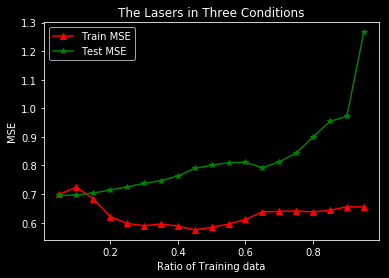

In [7]:
# To plot a graph, let's revise the function slightly so that we can store the MSE in a list
def myRegression(featureNames, labelName, dataTrain, dataTest, trainMSE, testMSE):
    # Training
    X, y = dataTrain[featureNames], dataTrain[labelName]
    theta, residuals, rank, s = np.linalg.lstsq(X, y)
    MSE = ((y - np.dot(X, theta))**2).mean()
    trainMSE.append(MSE)
    # Testing
    X, y = dataTest[featureNames], dataTest[labelName]
    MSE = ((y - np.dot(X, theta))**2).mean()
    testMSE.append(MSE)

def trainByRatio(ratio, data, featureNames, labelName, trainMSE, testMSE):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    myRegression(featureNames, labelName, train, test, trainMSE, testMSE)

trainMSE, testMSE = [], []
# ratio from 5% to 95%, step by 5%
ratios = [i/100 for i in list(range(5, 100, 5))]

for ratio in ratios:
    trainByRatio(ratio, data, featureNames, labelName, trainMSE, testMSE)

# plot a graph
plt.plot(ratios, trainMSE, 'r^-', label='Train MSE')
plt.plot(ratios, testMSE, 'g*-', label='Test MSE')
plt.title('The Lasers in Three Conditions')
plt.xlabel('Ratio of Training data')
plt.ylabel('MSE')
plt.legend()
plt.show()



 # Task -- Classification
 In this question we’ll alter the prediction from our regression task, so that we are now classifying whether a review is verified. Continue using the 90%/10% training and test sets you constructed previously, i.e., train on the training set and report the error/accuracy on the testing set.

 ## Problem 8
 First, let’s train a predictor that estimates whether a review is verified using the rating and the length:

 p(review is verified) ≃ σ(θ0 + θ1 × [star rating] + θ2 × [review length])

 Train a logistic regressor to make the above prediction (you may use a logistic regression library with de- fault parameters, e.g. linear model.LogisticRegression() from sklearn). Report the classification accuracy of this predictor. Report also the proportion of labels that are positive (i.e., the proportion of reviews that are verified) and the proportion of predictions that are positive (1 mark).

In [8]:
# Define My Own Classification
from sklearn.linear_model import LogisticRegression

def myClassification(featureNames, labelName, dataTrain, dataTest):
    X, y = dataTrain[featureNames], dataTrain[labelName]
    clf = LogisticRegression().fit(X, y)
    print("================ Training ================")
    print("Accuracy: ", clf.score(X, y))
    print("================ Testing ================")
    X, y = dataTest[featureNames], dataTest[labelName]
    print("Accuracy: ", clf.score(X, y))

def trainByRatio(ratio, data, featureNames, labelName):
    train = data[:int(len(data)*ratio)]
    test = data[int(len(data)*ratio):]
    print("================ For ratio ", ratio, "================")
    myClassification(featureNames, labelName, train, test)

featureNames = ['theta_zero', 'star_rating', 'review_body_length']
labelName = 'verified_purchase_int'
ratio = 0.9
trainByRatio(ratio, data, featureNames, labelName)



================ For ratio  0.9 ================
================ Training ================
Accuracy:  0.9511736456062275
================ Testing ================
Accuracy:  0.5597734475085968


 ## Problem 9
 Considering same prediction problem as above, can you come up with a more accurate predictor (e.g. using features from the text, timestamp, etc.)? Write down the feature vector you design, and report its train/test accuracy (1 mark).

In [9]:
# Let's analyze our dataset first
print(data['marketplace'].unique())
print(data['product_category'].unique())
print(data['vine'].unique())



['US']
['Gift Card']
['N']


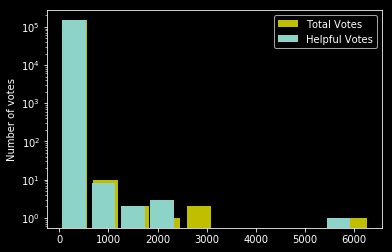

In [10]:
plt.hist(data['total_votes'], log=True, color='y',rwidth=0.8, label='Total Votes')
plt.hist(data['helpful_votes'], log=True, rwidth=0.8, label='Helpful Votes')
plt.ylabel('Number of votes')
plt.legend()
plt.show()
